In [ ]:
#Assignment 2 - Titanic Data Analysis
#Siddharth Balakrishnan - 20BCB0111
#Vellore Institute of Technology - Vellore Campus

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset - titanic.csv
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Univariate Analysis

<ipython-input-9-00da791e2a6f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap=colormap, annot=True, linewidths=0.2)


<Axes: >

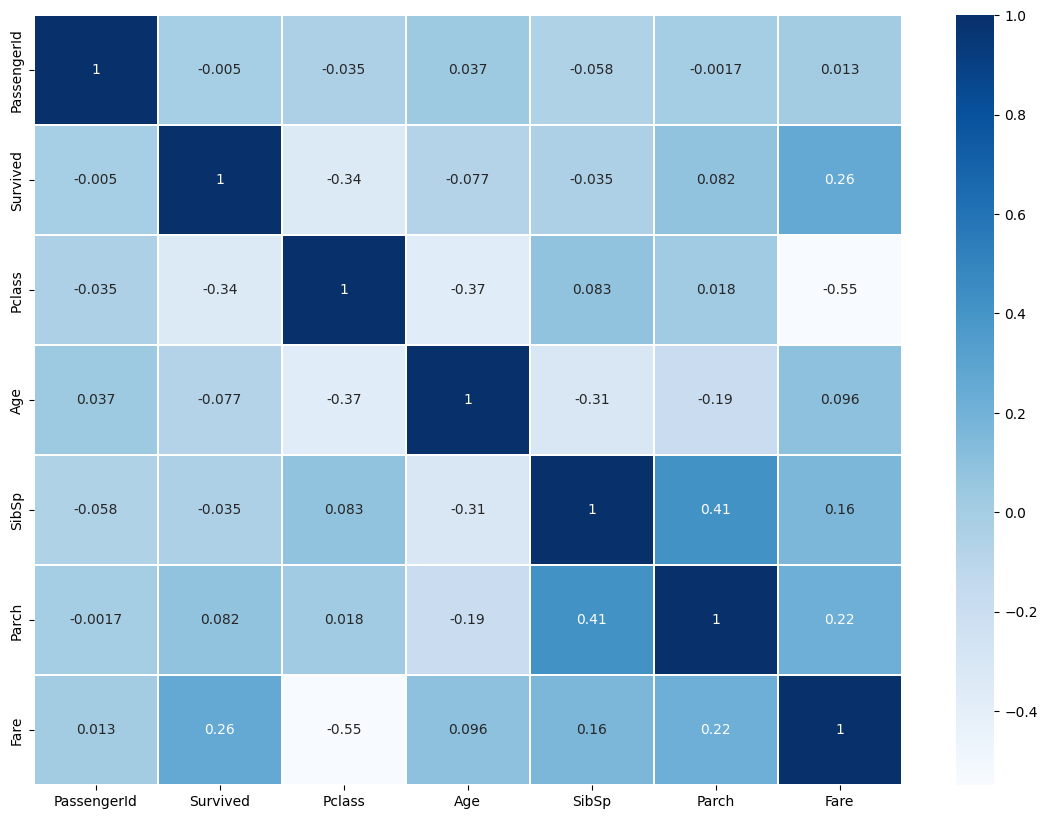

In [ ]:
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(dataset.corr(), cmap=colormap, annot=True, linewidths=0.2)

<Axes: ylabel='Survived'>

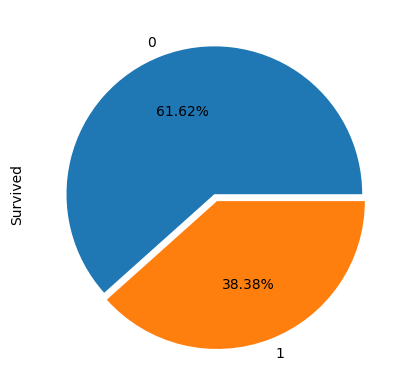

In [ ]:
explode = [0, 0.05]
dataset['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

In [ ]:
#Bivariate Analysis

In [ ]:
dataset.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

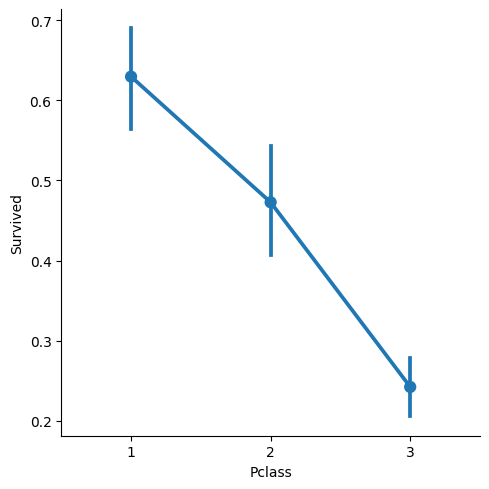

In [ ]:
sns.catplot(x='Pclass', y='Survived', data=dataset, kind='point')

In [ ]:
#Multivariate Analysis

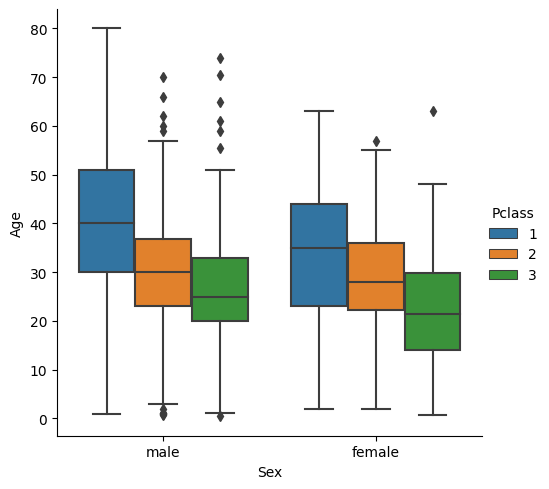

In [ ]:
sns.catplot(x='Sex', y='Age', data=dataset, kind='box', hue='Pclass')

In [ ]:
#Handling Missing Values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
dataset['Salutation'] = dataset.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
grp = dataset.groupby(['Sex', 'Pclass'])
grp.Age.apply(lambda x: x.fillna(x.median()))
dataset.Age.fillna(dataset.Age.median, inplace = True)

<ipython-input-22-b8df30a2055b>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grp.Age.apply(lambda x: x.fillna(x.median()))


In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Salutation       0
dtype: int64

In [ ]:
dataset.Cabin = dataset.Cabin.fillna('NA')

In [ ]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Salutation     0
dtype: int64

In [ ]:
dataset.Embarked.fillna(dataset.Embarked.mode()[0], inplace = True)

In [ ]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Salutation     0
dtype: int64

In [ ]:
#Dropping irrelevant attributes
dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


<Axes: >

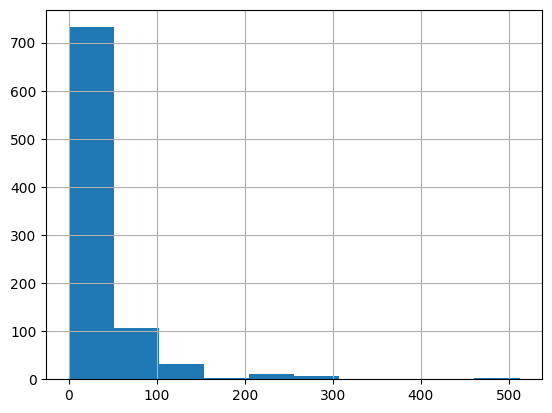

In [ ]:
#Handling outliers
dataset['Fare'].hist()

In [ ]:
Q1=dataset['Fare'].quantile(0.25)
Q3=dataset['Fare'].quantile(0.75)
IQR=Q3-Q1
IQR

23.0896

In [ ]:
#Spliting into independent and dependent variables
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
